In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_histogram

# Simple Circuit showing input and output

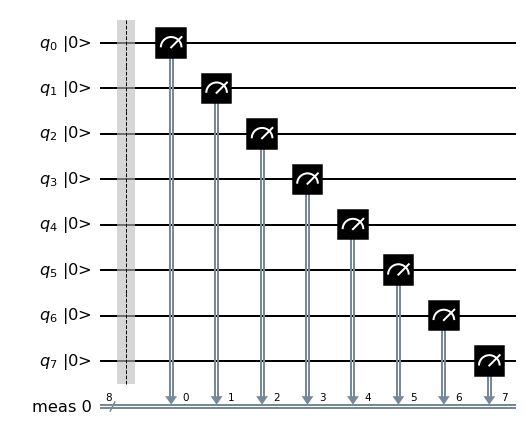

In [2]:
qc_output = QuantumCircuit(8)
qc_output.measure_all()
qc_output.draw('mpl', initial_state=True)

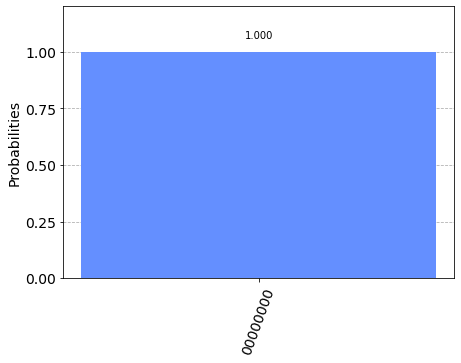

In [3]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

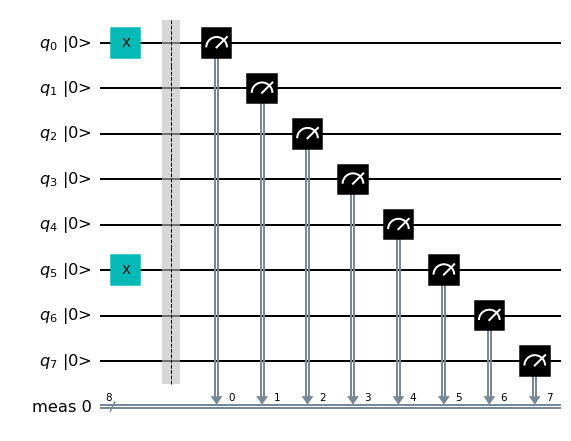

In [4]:
qc_encode = QuantumCircuit(8)
qc_encode.x(5)
qc_encode.x(0)
qc_encode.measure_all()
qc_encode.draw('mpl', initial_state=True)

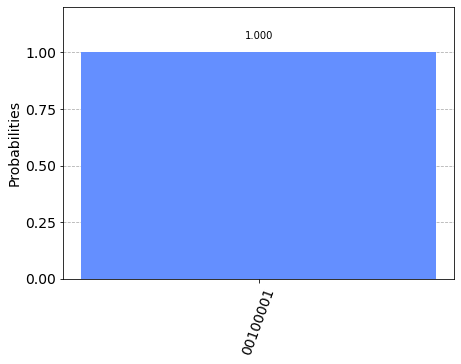

In [5]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc_encode,  shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

# Half adder

The basis of binary addition is to divide the operation into addition of 2 bits and add up partial results from there to get the final result.<br>
<br>
So, basically we need to calculate 4 basic sums
<br>

* 0 + 0 = 00
* 0 + 1 = 01
* 1 + 0 = 01
* 1 + 1 = 10

<br>
This is called a <b>half adder</b>. If our computer can implement this, and if it can chain many of them together, it can add anything.
<br>
2 bits we need to add are encoded in 2 qbits as input. <br>
<br>
<i>Now, lets look at each bit in the result separately.</i><br>
<br>
The rightmost bit in result => if both bits are equal, the result bit is 0 , otherwise 1 => classical XOR. <br>
In the quntum context, first qbit controls the result. If the first qbit is 0, the result is same as 2-nd qbit, but if first qbit is 1, the result qbit is NOT of 2-nd qbit. => NOT controlled by 1st qbit => Controlled-NOT (CNOT) <br>
<br>
Now lets look add leftmost result bit, leftmost result bit is 1 only when both bits are 1, otherwise 0 => classical AND <br>
In Quantum context, the result qbit is controlled by both qbits being 1 => controlled-controlled-not <i><b>(Toffoli Gate)</b></i>
<br>

<i> Now, let's create a circuit </i>

In [6]:
def half_adder(bit1, bit2):
    circ = QuantumCircuit(4, 2)
    if bit1 == 1:
        circ.x(0)
    if bit2 == 1:
        circ.x(1)
    circ.barrier()
    
    circ.cx(0, 2)
    circ.cx(1, 2)
    
    circ.ccx(0, 1, 3)
    circ.barrier()
    
    circ.measure(2, 0)
    circ.measure(3, 1)
    
    return circ

####  0 + 0 = 00 ####

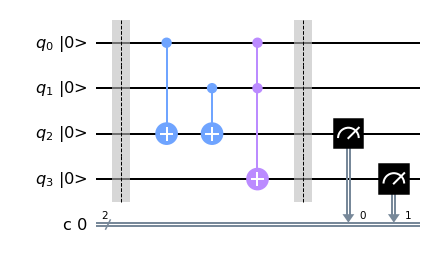

In [7]:
circ = half_adder(0, 0)
circ.draw('mpl', initial_state=True)

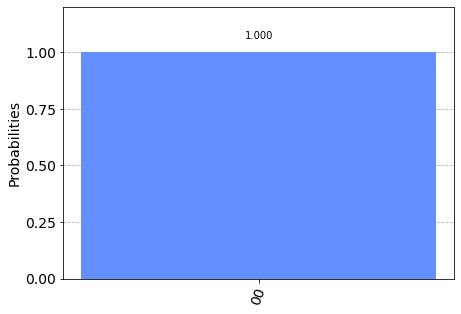

In [8]:
qobj = assemble(circ)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

#### 0 + 1 = 01 ####

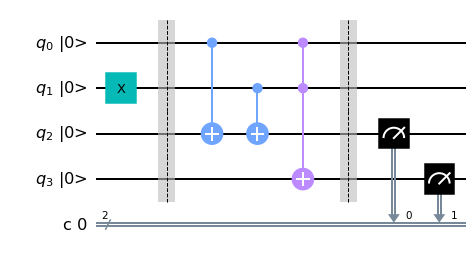

In [9]:
circ = half_adder(0, 1)
circ.draw('mpl', initial_state=True)

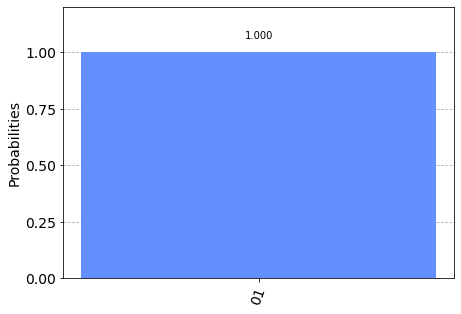

In [10]:
qobj = assemble(circ)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

#### 1 + 0 = 01 ####

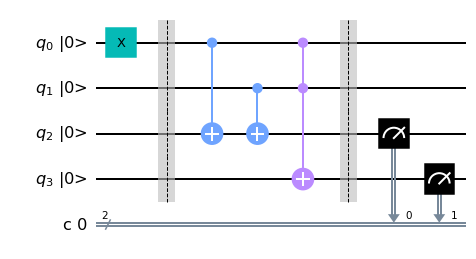

In [11]:
circ = half_adder(1, 0)
circ.draw('mpl', initial_state=True)

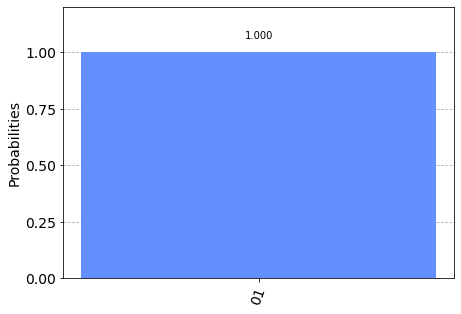

In [12]:
qobj = assemble(circ)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

#### 1 + 1 = 10 ####

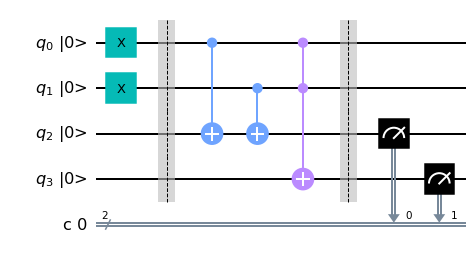

In [13]:
circ = half_adder(1, 1)
circ.draw('mpl', initial_state=True)

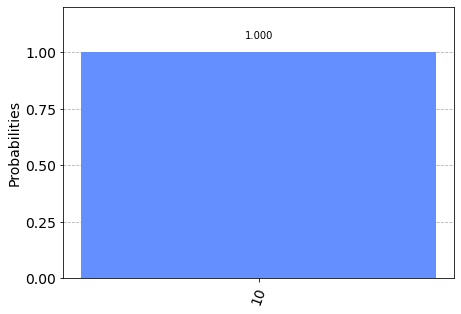

In [14]:
qobj = assemble(circ)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

# Now Let's use the half adder circuit to write addition program

**Note:-** we'll just do non-negative number addition here

In [15]:
def dec_to_bin(num):
    return bin(num)[2:]

In [16]:
def get_half_adder_res(bit1, bit2):
    circ = half_adder(int(bit1), int(bit2))
    qobj = assemble(circ)
    res = list(sim.run(qobj).result().get_counts().keys())[0]
    return res

In [17]:
def add(num1, num2):
    bin1 = (dec_to_bin(num1))[::-1]
    bin2 = (dec_to_bin(num2))[::-1]
    if len(bin1) > len(bin2):
        i = 0
        while i < len(bin1) -len(bin2):
            bin2 += '0'
    elif len(bin2) > len(bin1):
        i = 0
        while i < len(bin2) -len(bin1):
            bin1 += '0'
    assert(len(bin1) == len(bin2))
    carry = 0
    addn = ''
    for bit1, bit2 in zip(bin1, bin2):
        res = get_half_adder_res(bit1, bit2)
        res1 = get_half_adder_res(carry, res[1])
        res2 = get_half_adder_res(res[0], res1[0])
        addn += res1[1]
        carry = res2[1]
    if carry:
        addn += carry
        
    return int(addn[::-1], 2)

### Let's try

In [20]:
print(add(15, 63), 15+63)

78 78


In [21]:
print(add(1045646, 19854389), 1045646+19854389)

20900035 20900035


In [23]:
print(add(62198, 13), 62198+13)

62211 62211
